# Assignment 1 : SPA M

Name  - Ashwin

Rollno : 241310004

1. (20 marks) Compute following Fourier transforms of function f (x) using three versions (systems).

(a) f (x) = e−αx H(x), where H(x) is a Heaviside unit step function.

2
(b) f (x) = e−αx .

(c) For (a) & (b), compare the Fourier transform for α < 0 and α > 0.

(d) f (x) = x12 + 5i in x ∈ [1, ∞](use only one version for this question).

In [50]:
# import needed libraries

import numpy as np
import matplotlib.pyplot as plt

In [51]:
def FT_integral(x,func,s,version=1):
    x = np.array(x)
    integral = 0
    dx = np.diff(x).mean() 
    if version == 1:
        integral = np.sum( func(x) * np.exp( -2* np.pi * 1j * x * s) *dx )
    elif version == 2:
        integral = np.sum(func(x) * np.exp( -1* 1j * x * s) * dx )
    elif version == 3:
        integral = np.sum(func(x) * np.exp( -1* 1j * x * s) * dx )/np.sqrt(2*np.pi)
    return integral 


def FourierTransform(x, func, version=1, s_min=-10, s_max=10, N=1000):
    s = np.linspace(s_min, s_max, N)
    FT = np.zeros(N, dtype=complex)
    for i in range(N):
        FT[i] = FT_integral(x, func, s[i],version)
    return s, FT


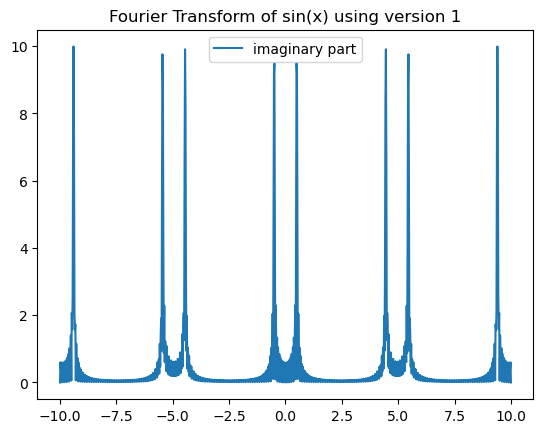

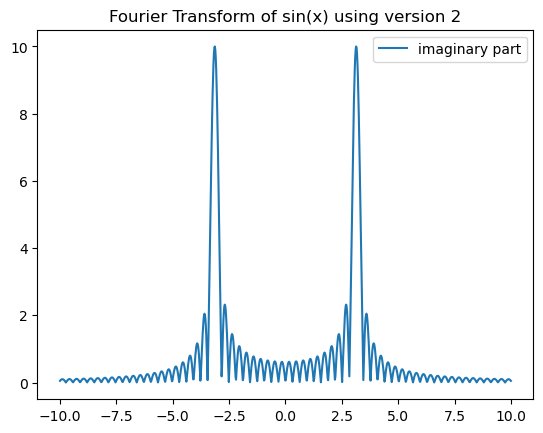

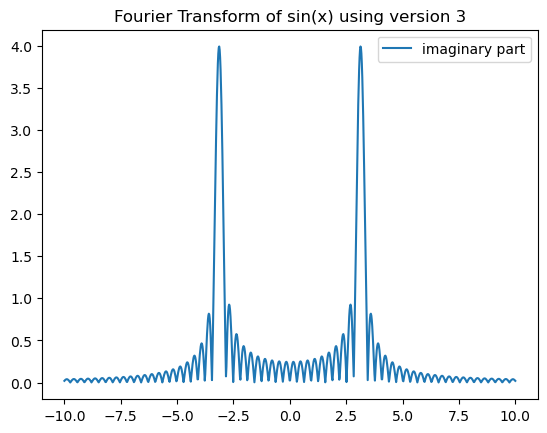

In [19]:
# making a test for the above 
def func(x):
    return np.sin(x*np.pi)

x = np.linspace(-10, 10, 100)
s, FT1 = FourierTransform(x, func, version=1)
s, FT2 = FourierTransform(x, func, version=2)
s, FT3 = FourierTransform(x, func, version=3)

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT1.imag), label='imaginary part')
plt.legend()
plt.title('Fourier Transform of sin(x) using version 1')
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT2.imag), label='imaginary part')
plt.legend()
plt.title('Fourier Transform of sin(x) using version 2')
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT3.imag), label='imaginary part')
plt.legend()
plt.title('Fourier Transform of sin(x) using version 3')
plt.show()


In [4]:
def plotAll3_FFT():
    s_min=-10
    s_max=10
    N=1000
    x = np.linspace(-10, 10, 100)
    s, FT1 = FourierTransform(x, func, version=1, s_min=s_min, s_max=s_max, N=N)
    s, FT2 = FourierTransform(x, func, version=2, s_min=s_min, s_max=s_max, N=N)
    s, FT3 = FourierTransform(x, func, version=3, s_min=s_min, s_max=s_max, N=N)

    #plt.plot(s, FT1.real, label='real part')
    plt.plot(s, abs(FT1.imag), label='imaginary part')
    plt.legend()
    plt.title('Fourier Transform of sin(x) using version 1')
    plt.show()

    # s_min=-100
    # s_max=100
    # N=1000

    # #plt.plot(s, FT1.real, label='real part')
    # plt.plot(s, abs(FT2.imag), label='imaginary part')
    # plt.legend()
    # plt.title('Fourier Transform of sin(x) using version 2')
    # plt.show()

    # #plt.plot(s, FT1.real, label='real part')
    # plt.plot(s, abs(FT3.imag), label='imaginary part')
    # plt.legend()
    # plt.title('Fourier Transform of sin(x) using version 3')
    # plt.show()

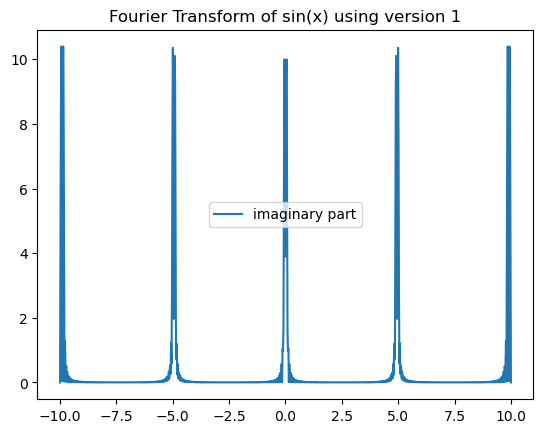

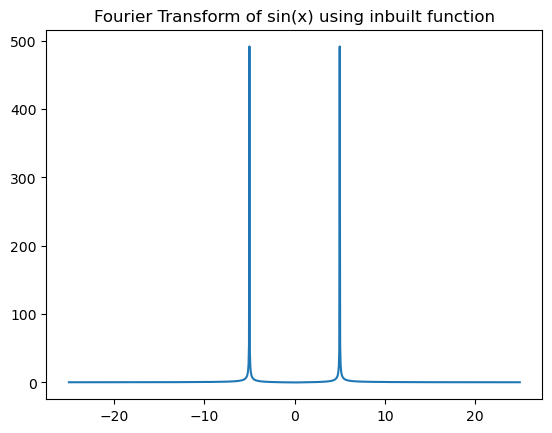

In [5]:
# making a test for the above 
def func(t):
    f = 5
    return np.sin(2*np.pi * f* t) #+ np.sin(2*np.pi * 9 * t)/2

plotAll3_FFT()

#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]
    f = np.fft.fftfreq(N, dt)
    f = np.fft.fftshift(f)
    FT = np.fft.fft(func(x))
    FT = np.fft.fftshift(FT)
    return f, FT
#plot
x = np.linspace(-10, 10, 1000)
f, FT = FT_inbuilt(x, func)
plt.plot(f, abs(FT))
plt.title('Fourier Transform of sin(x) using inbuilt function')
plt.show()


In [97]:
import numpy as np

def FT_integral(x, func, s, version=1, apply_window=True):
    x = np.array(x)
    dx = np.diff(x).mean()  # Generalized step size

    if apply_window:
        window = np.exp(-0.01 * x**2)  # Gaussian window
        func_windowed = func(x) * window
    else:
        func_windowed = func(x)

    # Subtract mean to remove DC component
    func_centered = lambda t: func_windowed(t) - np.mean(func_windowed(t))

    if version == 1:
        kernel = np.exp(-2j * np.pi * x * s)  # Standard Fourier Transform
    elif version == 2:
        kernel = np.exp(-1j * x * s)  # Alternative convention
    elif version == 3:
        kernel = np.exp(-1j * x * s) / (2 * np.pi)  # With normalization
    
    integral = np.sum(func_centered(x) * kernel * dx)  # Vectorized summation
    return integral

def FourierTransform(x, func, version=1, s_min=-10, s_max=10, N=1000):
    s = np.linspace(s_min, s_max, N)
    FT = np.array([FT_integral(x, func, s_i, version) for s_i in s])
    return s, FT

# making a test for the above 
def func(t):
    f = 5
    return np.sin(2*np.pi * f* t) #+ np.sin(2*np.pi * 9 * t)/2

s_min=-10
s_max=10
N=1000
x = np.linspace(-10, 10, 100)
s, FT1 = FourierTransform(x, func, version=1, s_min=s_min, s_max=s_max, N=N)


#plt.plot(s, FT1.real, label='real part')
plt.plot(s, FT1.imag, label='imaginary part')
plt.legend()
plt.title('Fourier Transform of sin(x) using version 1')
plt.show()



TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# making a test for the above 
def func(t):
    f = 5
    return np.sin(2*np.pi * f* t) #+ np.sin(2*np.pi * 9 * t)/2

plotAll3_FFT()

#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]
    f = np.fft.fftfreq(N, dt)
    f = np.fft.fftshift(f)
    FT = np.fft.fft(func(x))
    FT = np.fft.fftshift(FT)
    return f, FT
#plot
x = np.linspace(-10, 10, 1000)
f, FT = FT_inbuilt(x, func)
plt.plot(f, abs(FT))
plt.title('Fourier Transform of sin(x) using inbuilt function')
plt.show()


In [ ]:

def FT_integral(x,func,s,version=1):
    x = np.array(x)
    integral = 0
    dx = np.diff(x).mean() 
    if version == 1:
        integral = np.sum( func(x) * np.exp( -2* np.pi * 1j * x * s) *dx )
    elif version == 2:
        integral = np.sum(func(x) * np.exp( -1* 1j * x * s) * dx )
    elif version == 3:
        integral = np.sum(func(x) * np.exp( -1* 1j * x * s) * dx )/np.sqrt(2*np.pi)
    return integral 


def FourierTransform(x, func, version=1, s_min=-10, s_max=10, N=1000):
    s = np.linspace(s_min, s_max, N)
    FT = np.zeros(N, dtype=complex)
    apply_window = True
    if apply_window:
        func_windowed = lambda t: func(t) * np.exp(-0.01 * t**2)
        func_centered = lambda t: func_windowed(t) - np.mean(func_windowed(t))
    else:
        func_centered = func

    for i in range(N):
        FT[i] = FT_integral(x, func_centered, s[i],version)
    return s, FT

# making a test for the above 
def func(t):
    f = 9
    f2 = 14
    return np.sin(2*np.pi * f* t) + np.sin(2*np.pi * f2 * t)/2

s_min=-15
s_max=15
N=1000

x = np.linspace(-10, 10, 100)
s, FT1 = FourierTransform(x, func, version=1, s_min=s_min, s_max=s_max, N=N)


#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT1.imag), label='imaginary part')
plt.legend()
plt.title('Fourier Transform of sin(x) using version 1')
plt.show()

#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]
    f = np.fft.fftfreq(N, dt)
    f = np.fft.fftshift(f)
    FT = np.fft.fft(func(x))
    FT = np.fft.fftshift(FT)
    return f, FT
#plot
x = np.linspace(-10, 10, 1000)
f, FT = FT_inbuilt(x, func)
plt.plot(f, abs(FT))
plt.title('Fourier Transform of sin(x) using inbuilt function')
plt.show()


/tmp/ipykernel_288996/1177641618.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


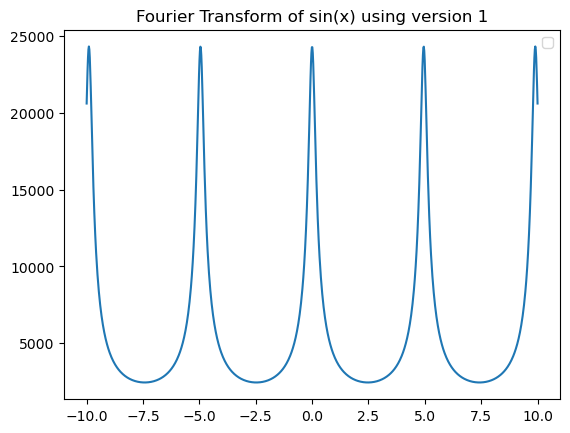

/tmp/ipykernel_288996/1177641618.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


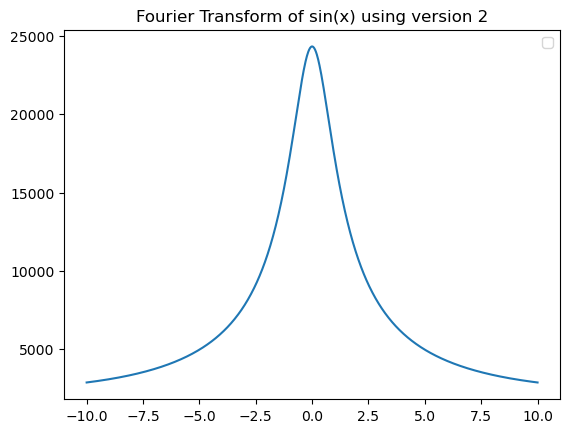

/tmp/ipykernel_288996/1177641618.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


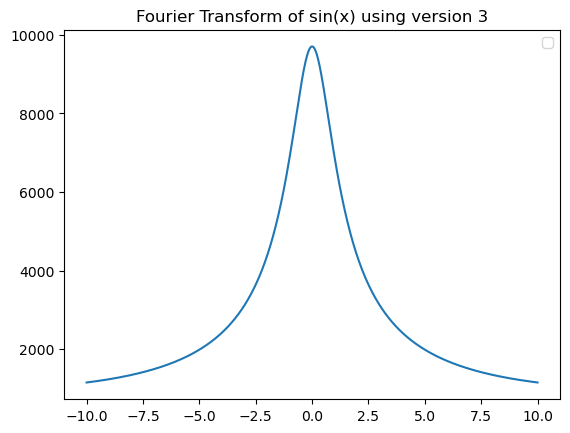

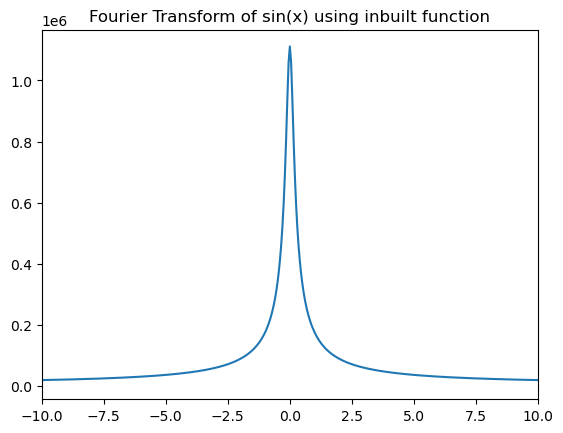

In [ ]:
# making a test for the above

def func(x):
    alpha = -1
    x = np.array(x)
    h = np.heaviside(x, 1)
    return h * np.exp(-alpha * x)

#lambdifying and vactorizing above eqn
func2 = lambda x: func(x)
func3 = np.vectorize(func2) 

x = np.linspace(-10, 10, 100)
s, FT1 = FourierTransform(x, func, version=1)
s, FT2 = FourierTransform(x, func, version=2)
s, FT3 = FourierTransform(x, func, version=3)

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT1))
plt.legend()
plt.title('Fourier Transform of sin(x) using version 1')
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT2))
plt.legend()
plt.title('Fourier Transform of sin(x) using version 2')
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT3))
plt.legend()
plt.title('Fourier Transform of sin(x) using version 3')
plt.show()


s_min, s_max =-10,10
#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]
    f = np.fft.fftfreq(N, dt)
    f = np.fft.fftshift(f)
    FT = np.fft.fft(func(x))
    FT = np.fft.fftshift(FT)
    return f, FT
#plot
x = np.linspace(-10, 10, 1000)
f, FT = FT_inbuilt(x, func)
plt.plot(f, abs(FT))
plt.title('Fourier Transform of sin(x) using inbuilt function')
plt.xlim(s_min, s_max)
plt.show()



In [1]:
# making a test for the above


func = lambda x: pow(x,-2) + 5j
#func_ans = lambda k: pow(np.e,-k* 1j )/(k*1j-1) + 5*pow(np.e,-k* 1j )/(k)
func_ans = lambda k:  np.pi * k
#func = np.vectorize(func2) 

x = np.linspace(-100, 100, 1000)

s, FT1 = FourierTransform(x, func, version=1)
s, FT2 = FourierTransform(x, func, version=2)
s, FT3 = FourierTransform(x, func, version=3)

s_min, s_max =-100,100
#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]
    f = np.fft.fftfreq(N, dt)
    f = np.fft.fftshift(f)
    FT = np.fft.fft(func(x))
    FT = np.fft.fftshift(FT)
    return f, FT
#plot

f, FT = FT_inbuilt(x, func)
plt.plot(f, FT, label = "fft" )

#plt.plot(f, abs(FT)/max(abs(FT)), label = "fft" )
plt.legend()
plt.title('Fourier Transform of using inbuilt function')
#plt.xlim(s_min, s_max)
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, FT1, label = "FT1")
#plt.plot(f,func_ans(f), label = "func_ans" )
plt.legend()
plt.title('Fourier Transform of using version 1')
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, FT2)
#plt.plot(f,func_ans(f), label = "func_ans" )

plt.legend()
plt.title('Fourier Transform of using version 2')
plt.show()

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, FT3)
plt.legend()
plt.title('Fourier Transform of  using version 3')
plt.show()





NameError: name 'np' is not defined

# Q 3 
The function f (x) is equal to unity when x lies between -1/2 and 1/2 and is zero outside.
Draw accurate loci on the complex plane of F (s) from which values of F (0), F (1/2), F (1), F (3/2)
and F (2) can be measured.

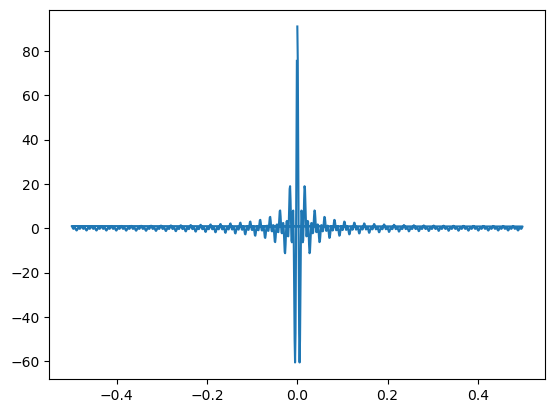

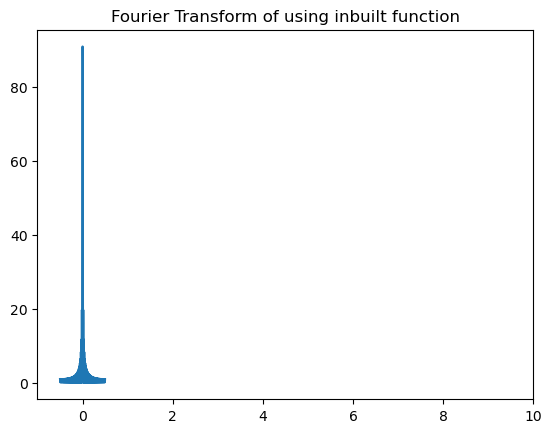

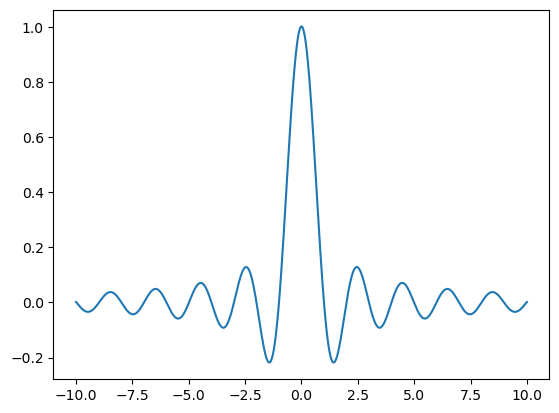

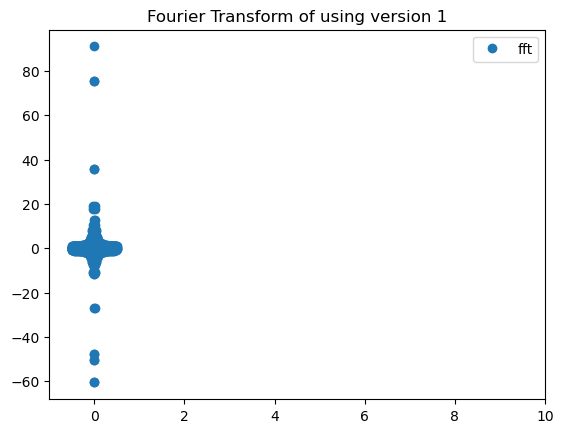

FT at 0 is (1.002002002002002+0j)
FT at 0.5 is (0.636635774547167-0.004004157447591583j)
FT at 1 is (-0.002002229709951453+2.5187275011454013e-05j)
FT at 1.5 is (-0.21225460763701104+0.004005385346555271j)
FT at 2 is (0.0020029131301115-5.039971993284209e-05j)


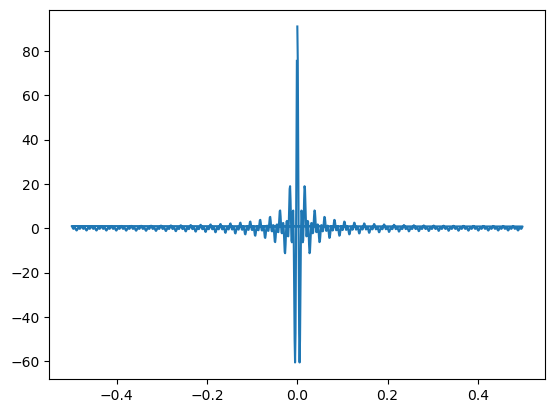

[ 500 1000 1000 1000 1000]
FT at 0.0 is 91.0


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [107]:
def func0(x): 
    if x <=1/2 and x >= -1/2:
        return 1
    else:
        return 0

#lambdifying and vactorizing above eqn
func2 = lambda x: func0(x)
func = np.vectorize(func2)

#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]

    sp = np.fft.fft(func(x))
    freq = np.fft.fftfreq(x.shape[-1])
    plt.plot(freq, sp.real)
    plt.show()
    f = np.fft.fftshift(freq)
    FT = np.fft.fftshift(sp)
    return f, FT
#plot
x = np.linspace(-1, 10, 1000)

f, FT = FT_inbuilt(x, func)
plt.plot(f, abs(FT))
plt.title('Fourier Transform of using inbuilt function')
plt.xlim(min(x),max(x))
plt.show()


def FT_integral(x,func,s,version=1):
    x = np.array(x)
    integral = 0
    dx = np.diff(x).mean() 
    if version == 1:
        integral = np.sum( func(x) * np.exp( -2* np.pi * 1j * x * s) *dx )
    elif version == 2:
        integral = np.sum(func(x) * np.exp( -1* 1j * x * s) * dx )
    elif version == 3:
        integral = np.sum(func(x) * np.exp( -1* 1j * x * s) * dx )/np.sqrt(2*np.pi)
    return integral 


def FourierTransform(x, func, version=1, s_min=-10, s_max=10, N=1000):
    s = np.linspace(s_min, s_max, N)
    FT = np.zeros(N, dtype=complex)
    for i in range(N):
        FT[i] = FT_integral(x, func, s[i],version)
    return s, FT


s, FT1 = FourierTransform(x, func, version=1)


#plt.plot(s, FT1.real, label='real part')
plt.plot(s,FT1, label = "FT1")
plt.show()
plt.plot(f, FT.real,"o", label = "fft" )

plt.legend()
plt.title('Fourier Transform of using version 1')
plt.xlim(min(x),max(x))
plt.show()



S_list = [0,1/2,1,3/2,2]

for i in S_list:
    print(f"FT at {i} is {FT_integral(x, func, i,version=1)}")

# Find the index where f haveing frequencies from S_list 
f, FT = FT_inbuilt(x, func)
index = np.searchsorted(f, S_list)
print(index)
for i in index:
    print(f"FT at {f[i]} is {abs(FT[i])}")

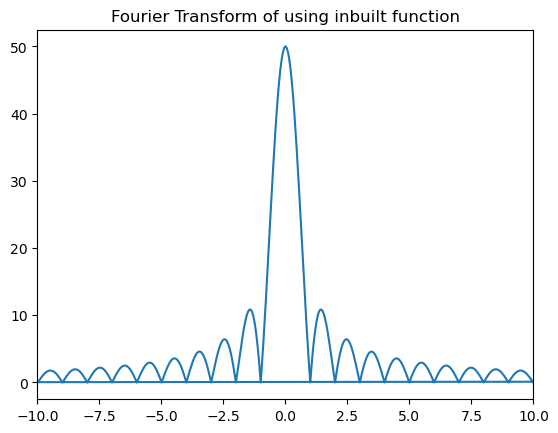

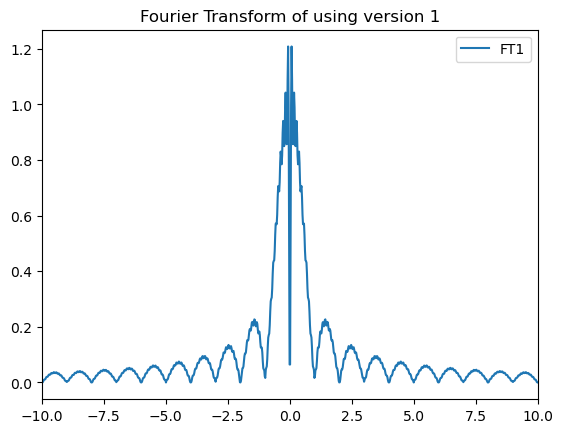

FT at 0 is (1.0010010010010009+0j)
FT at 0.5 is (0.6367239268835192+0j)
FT at 1 is (-0.0010016596062338463+0j)
FT at 1.5 is (-0.2125193420798862+0j)
FT at 2 is (0.001003639071339239-1.3010426069826053e-18j)
[1000 1000 1000 1000 1000]


In [47]:
def FT_integral(x, func, s, version=1):
    x = np.array(x)
    dx = np.diff(x).mean()  # Step size
    N = len(x)  # Number of samples

    if version == 1:
        integral = np.sum(func(x) * np.exp(-2 * np.pi * 1j * x * s) * dx) 
    elif version == 2:
        integral = np.sum(func(x) * np.exp(-1j * x * s) * dx) 
    elif version == 3:
        integral = np.sum(func(x) * np.exp(-1j * x * s) * dx) / np.sqrt(2 * np.pi * N)

    return integral


def FourierTransform(x, func, version=1, s_min=-10, s_max=10, N=1000):
    s = np.linspace(s_min, s_max, N)
    FT = np.zeros(N, dtype=complex)

    apply_window = True
    if apply_window:
        func_windowed = lambda t: func(t) * np.exp(-0.01 * t**2)
        func_centered = lambda t: func_windowed(t) - np.mean(func_windowed(t))
    else:
        func_centered = func

    for i in range(N):
        FT[i] = FT_integral(x, func_centered, s[i], version)

    return s, FT


def func0(x): 
    if x <=1/2 and x >= -1/2:
        return 1
    else:
        return 0

#lambdifying and vactorizing above eqn
func2 = lambda x: func0(x)
func = np.vectorize(func2)

#use inbilt fft
def FT_inbuilt(x, func):
    N = len(x)
    dt = x[1] - x[0]
    f = np.fft.fftfreq(N, dt)
    #f = np.fft.fftshift(f)
    FT = np.fft.fft(func(x))
   # FT = np.fft.fftshift(FT)
    return f, FT
#plot
x = np.linspace(-10, 10, 1000)

f, FT = FT_inbuilt(x, func)
plt.plot(f, abs(FT))
plt.title('Fourier Transform of using inbuilt function')
plt.xlim(min(x),max(x))
plt.show()

s, FT1 = FourierTransform(x, func, version=1)

#plt.plot(s, FT1.real, label='real part')
plt.plot(s, abs(FT1), label = "FT1")
#plt.plot(f, FT, label = "fft" )

plt.legend()
plt.title('Fourier Transform of using version 1')
plt.xlim(min(x),max(x))
plt.show()



S_list = [0,1/2,1,3/2,2]

for i in S_list:
    print(f"FT at {i} is {FT_integral(x, func, i,version=1)}")

# Find the index where f haveing frequencies from S_list 
f, FT = FT_inbuilt(x, func)
index = np.searchsorted(f, S_list)
print(index)
#for i in index:
#    print(f"FT at {f[i]} is {abs(FT[i])}")

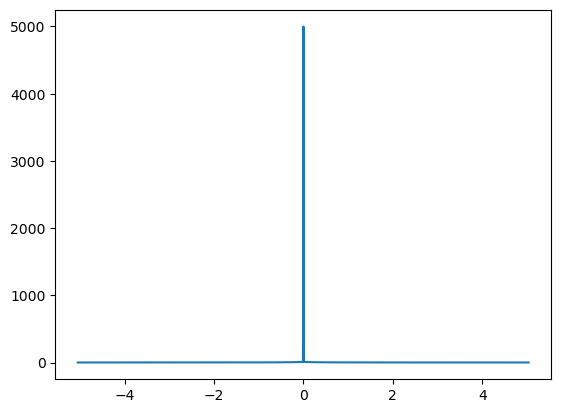

In [96]:
func = lambda x: pow(x,-2) + 5j
#func_ans = lambda k: pow(np.e,-k* 1j )/(k*1j-1) + 5*pow(np.e,-k* 1j )/(k)
#func = np.vectorize(func2) 

x = np.linspace(1, 100, 1000)
# concat to numpy arrey extend

N = len(x)
dt = x[1] - x[0]
f = np.fft.fftfreq(N, dt)
f = np.fft.fftshift(f)
FT = np.fft.fft(func(x))
FT = np.fft.fftshift(FT)

plt.plot(f, abs(FT))

Q 4 C

(c) Consider g(x) = e−x , and σ = 1, plot the Fourier power |F (s)|2 using scipy libraries. Write
the python code.


0.0011479085908026449
1.0021920720012838


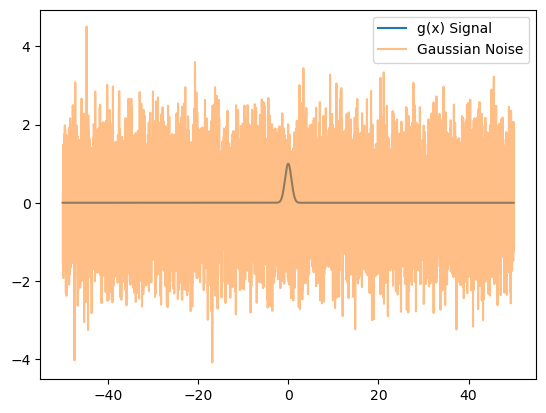

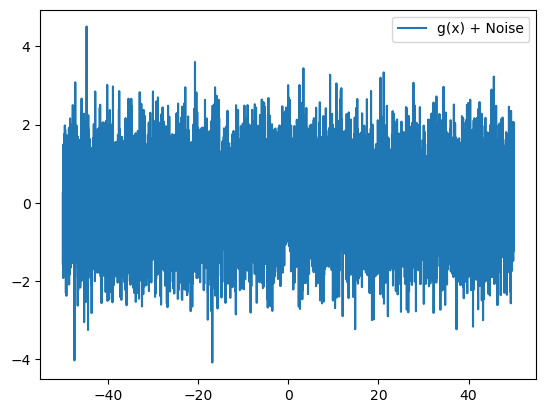

In [19]:
func_g = lambda x: np.exp(-x**2)



x = np.linspace(-50, 50, 10000)
func_noise = np.random.normal(0, 1, size=x.shape)
print(np.mean(func_noise))
print(np.std(func_noise))

# plot signal
plt.plot(x, func_g(x), label='g(x) Signal')
plt.plot(x, func_noise,alpha = 0.5, label='Gaussian Noise')
plt.legend()
plt.show()
plt.plot(x, func_g(x) + func_noise, label='g(x) + Noise')
plt.legend()
plt.show()


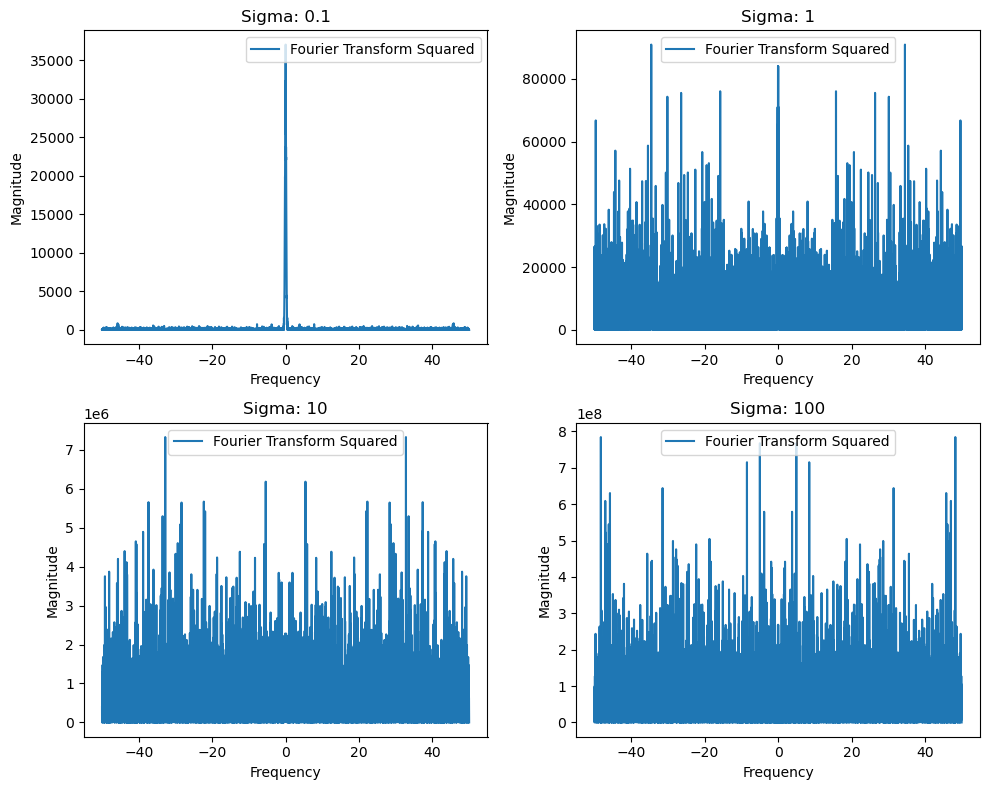

In [18]:
sigma = [0.1,1,10,100]

plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)
for i in range(len(sigma)):
    plt.subplot(2, 2, i+1)
    func_noise = np.random.normal(0, sigma[i], size=x.shape)
    F = fft(func_g(x) + func_noise)
    freq = np.fft.fftfreq(len(x), x[1] - x[0])
    freq = np.fft.fftshift(freq)
    F = np.fft.fftshift(F)
    plt.plot(freq, np.square(F.real), label='Fourier Transform Squared')
    plt.title(f'Sigma: {sigma[i]}')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
func_g = lambda x: np.exp(-x**2)

x = np.linspace(-50, 50, 10000)
func_noise = np.random.normal(0, 100, size=x.shape)
print(np.mean(func_noise))
print(np.std(func_noise))

# plot signal
plt.plot(x, func_g(x), label='g(x) Signal')
plt.plot(x, func_noise,alpha = 0.5, label='Gaussian Noise')
plt.legend()
plt.show()
plt.plot(x, func_g(x) + func_noise, label='g(x) + Noise')
plt.legend()
plt.show()

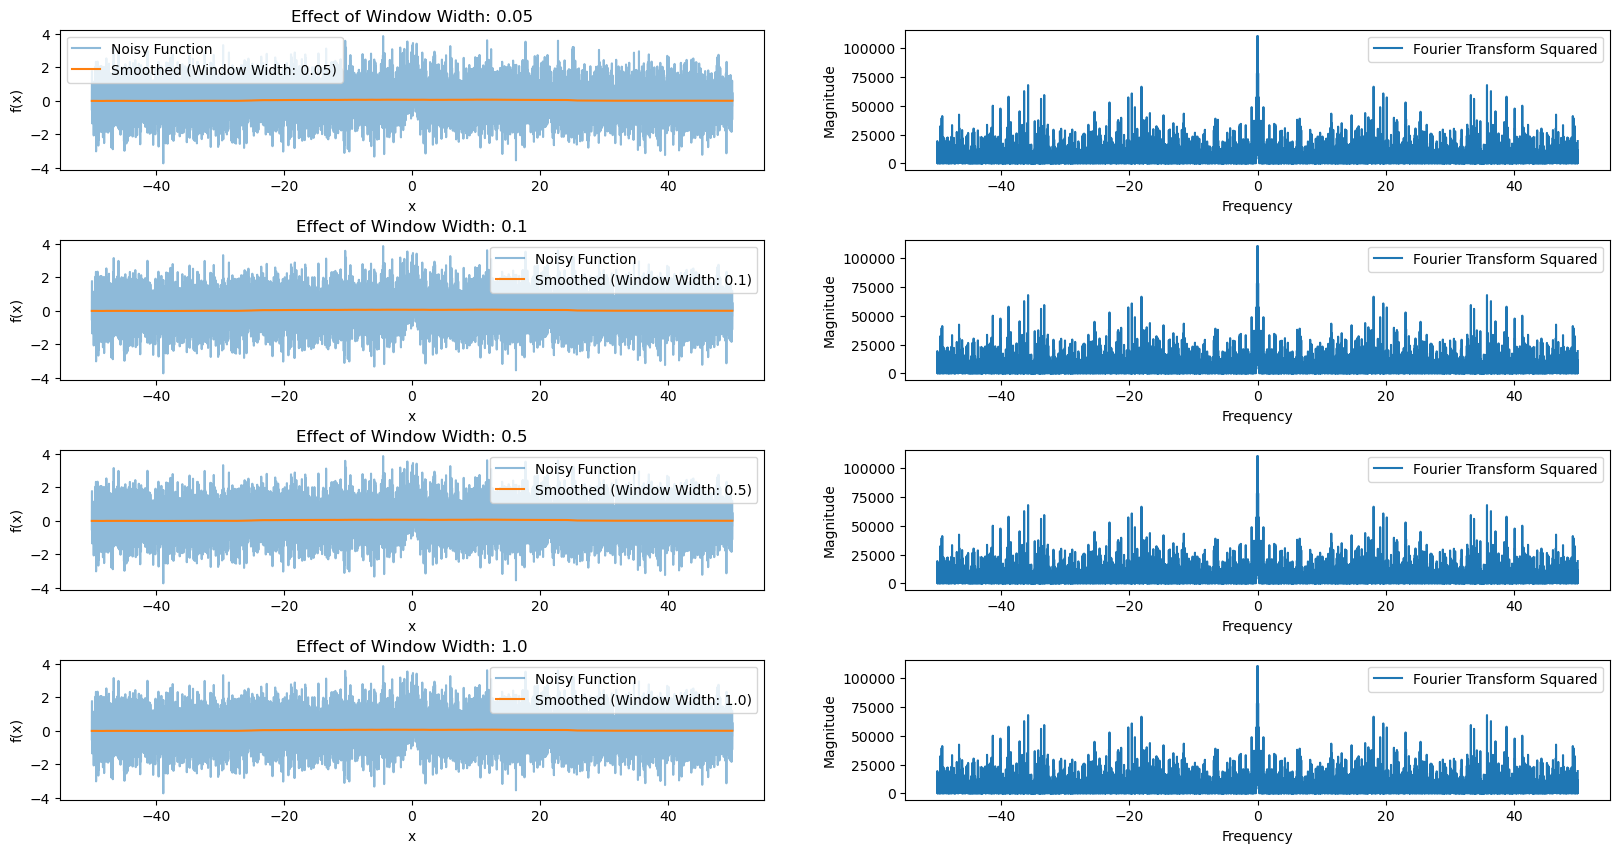

In [34]:
# Define the rectangular wave function (window)
def rectangular_window(width, x):
    return np.where(np.abs(x) <= width / 2, 1, 0)

# Smoothen the function using convolution
def smoothen_function(func, x, window_width):
    window = rectangular_window(window_width, np.linspace(-window_width, window_width, len(x)))
    window = window / np.sum(window)  # Normalize the window
    smoothed_func = np.convolve(func, window, mode='same')
    return smoothed_func

# Original function with noise
sigma = 1
func_g = lambda x: 1*np.exp(-x**2)
func_noise = np.random.normal(0, sigma, size=x.shape)
noisy_func = func_g(x) + func_noise

# Demonstrate the effect of increasing and decreasing the window size
window_sizes = [0.05, 0.1, 0.5, 1.0]

plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)
for i, window_size in enumerate(window_sizes):
    smoothed_func = smoothen_function(noisy_func, x, window_size)
    plt.subplot( 4,2, 2*i + 1)
    
    plt.plot(x, noisy_func, alpha=0.5, label='Noisy Function')
    plt.plot(x, smoothed_func, label=f'Smoothed (Window Width: {window_size})')
    plt.title(f'Effect of Window Width: {window_size}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    plt.subplot(4,2, 2*i + 2)
    F = fft(func_g(x) + func_noise)
    freq = np.fft.fftfreq(len(x), x[1] - x[0])
    freq = np.fft.fftshift(freq)
    F = np.fft.fftshift(F)
    plt.plot(freq, np.square(F.real), label='Fourier Transform Squared')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend()

#plt.tight_layout()
plt.show()